In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from soundsig.sound import BioSound 
from soundsig.sound import WavFile
import os
%matplotlib inline


In [2]:
from IPython.core.debugger import set_trace

In [17]:
""" Make sure to set your directory to the directory containing our .h5 files we want."""
""" We can loop over an entire dataset or pick from components or specific files of interest."""
# vocSelData is going to be a list of dictionary containing the values that we are going to extract from each BioSound object.
vocSelData1 = [];
normFlg=True;
# change directory 
os.chdir('/mnt/c/Users/bassp/Downloads/Python Work/bat_data/sample_pre/sample_pre/')
# load in text file for shifts
f = open("fname_list_preshift.txt")
lines = f.readlines()
mylist = [item.rstrip('\n') for item in lines]
lines = np.asarray(mylist)

shapeSpectro = []
count_1 =0
# make room for spectrograms
for fname in os.listdir('.'):
    if fname.endswith('.h5'):
        
        
        # Allocate object and read data
        myBioSound = BioSound()
        myBioSound.readh5(fname)
        shapeSpectro.append(myBioSound.spectro.shape)
        count_1 += 1

shapeSpectro.sort()
shapeDesired = shapeSpectro[0]


#X = np.zeros((count_1, shapeDesired[0]*shapeDesired[1]))

print('Allocated space for all spectrograms')
# Looping through all the files

count = 0

for fname in os.listdir('.'):
    if fname.endswith('.h5'):
        
        
        
        
        name = lines[count];
        count +=1
        
        calltype = lines[count];
        count +=1
        
        
        
        # Allocate object and read data
        myBioSound = BioSound()
        myBioSound.readh5(fname)
        shift = 'preshift'
        # Take the time average formants 
        meanF1 = np.mean(myBioSound.F1[~np.isnan(myBioSound.F1)])
        meanF2 = np.mean(myBioSound.F2[~np.isnan(myBioSound.F2)])
        meanF3 = np.mean(myBioSound.F3[~np.isnan(myBioSound.F3)])
        #### spectro code
        

            
       
        X = myBioSound.spectro
        #X[count,:] = np.ravel(myBioSound.spectro[0:shapeDesired[0], 0:shapeDesired[1]])
        
        
       
        # Get values for the fundamental
        if myBioSound.fund is not None:
            
            fund = (myBioSound.fund)
            
            fund2 = (myBioSound.fund2)
            kspec = (myBioSound.kurtosisspect)
            espec = (myBioSound.entropyspect)
            meanspec = (myBioSound.meanspect)
            skewspec = (myBioSound.skewspect)
            stdspec = (myBioSound.stdspect)
            cvfund = (myBioSound.cvfund)
            maxfund = (myBioSound.maxfund)
            minfund = (myBioSound.minfund)
            
            f0 = np.ravel(np.mean(myBioSound.f0[~np.isnan(myBioSound.f0)]))
            f0_2 = np.mean(myBioSound.f0_2[~np.isnan(myBioSound.f0_2)])
            sal = (myBioSound.sal)  
                           
        else:
            fund = None 
            cvfund = None   
        mps = myBioSound.mps
        vocSelData1.append({ 
                     "fund": fund, 
                     "cvfund": cvfund, "maxfund": maxfund, "minfund": minfund,
                     "F1": meanF1, "F2": meanF2, "F3":meanF3,
                      "rms": (myBioSound.rms), 
                     "maxAmp": (myBioSound.maxAmp),
                     "meanS": (myBioSound.meanspect), "stdS": (myBioSound.stdspect),
                     "skewS": (myBioSound.skewspect), "kurtS": (myBioSound.kurtosisspect), 
                     "entS": (myBioSound.entropyspect),
                     "q1": (myBioSound.q1), "q2": (myBioSound.q2), "q3": (myBioSound.q3),                  
                     "meanT": (myBioSound.meantime), "stdT": (myBioSound.stdtime),
                     "skewT": (myBioSound.skewtime), "kurtT": (myBioSound.kurtosistime),
                     "entT": (myBioSound.entropytime), "spectro": X, 
                     "mps": mps , "f0_2": f0_2, "sal": sal, "f0": f0,  "shift":shift, "name":name,"type":calltype
                      
})

# Make a panda data frame with all the data                    
#vocSelTable = pd.DataFrame(vocSelData)


Allocated space for all spectrograms


In [18]:
# save variable
vocSelTable1 = pd.DataFrame(vocSelData1)
#vocSelTable.to_pickle('df2025.pkl')
df = pd.concat([df,vocSelTable1])
# Note, you can load in each of the dataframes for each shift and then concat them together
# See pandas documentation for correct orientation of data.

In [ ]:
# load in original df here. 
df_pca = pd.read_pickle('dfpca.pkl')

### I modified original df to replace nan with 0, also dropped F3 since it was mostly junk
#### Now I will create a PCA df with the call type/shift etc dropped

In [63]:
df_pca = df.drop(columns=['shift','type','name','F3','spectro','mps','f0'])




,F1,F2,F3,cvfund,entS,entT,f0,f0_2,fund,kurtS,...,q3,rms,sal,shift,skewS,skewT,spectro,stdS,stdT,type


In [84]:
from sklearn.decomposition import PCA
from scipy.stats.mstats import zscore

X_pca = df_pca.replace([np.inf, -np.inf], np.nan).fillna(0).astype('float').abs().as_matrix()
nPcs = 5
pca = PCA(n_components=nPcs)
Xr = pca.fit_transform(X_pca)

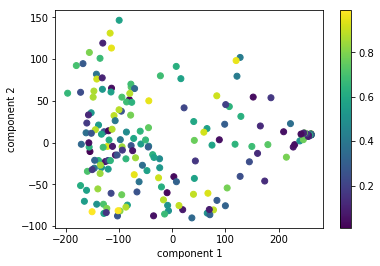

In [93]:
colors = np.random.rand(191)

plt.scatter(Xr[:, 0], Xr[:, 1],c=colors,cmap='viridis')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

#### So PCA appears to be minimally effective (~75% of variance supposedly explained. Some clustering is there, but group labels will be the key. Also, there is no MPS/Spectrogram, which means that clustering most likely will not occur through PCA without these parameters.



## LDA

### USING LDA with labels should be much more effective, given large differences in types of calls. I also want to use spectro/mps, so I will unpack/unravel these values from my dataframe.

In [99]:
y = pd.read_pickle('calltype.pkl')
## Code to make MPS/spectro/f0 better behaved

spectro_vals = np.array(df['spectro'])
mps_vals = np.array(df['mps'])
f0_vals = np.array(df['f0'])
print (spectro_vals[1].shape)

(191, 97)


In [120]:
spec_len_list = []

for ix in range(0,151):
    spec_len_list.append( spectro_vals[ix].shape)
    
spec_len_list.sort(reverse=True)  
dims = spec_len_list[0]
print dims

(191, 305)


In [121]:
mps_len_list = []
for iy in range(0,151):
    mps_len_list.append(mps_vals[ix].shape)
mps_len_list.sort(reverse=True)
dims_mps = mps_len_list[0]
print dims_mps

(191, 121)


In [124]:
print len(spectro_vals)
spec_dims = dims

152


In [125]:
spec_array = np.zeros((152, 191*305))
mps_array = np.zeros((152,191*121))


In [128]:
print spec_array.shape

(152, 58255)


In [153]:

counter = 0
for i_m in range(0,151):
    m_val = mps_vals[i_m]
    w,l = m_val.shape
    try:
        mps_array[counter,0:(w-1)*(l-1)] = np.ravel(m_val[0:w-1, 0:l-1])
    except:
        print (i_m,w,l)
    counter +=1


In [154]:
counter=0

for i_s in range(0,151):
    s_val = spectro_vals[i_s]
    w,l = s_val.shape
    spec_array[counter,0:(w-1)*(l-1)] = np.ravel(s_val[0:(w-1),0:(l-1)])
    counter +=1


In [158]:
df_mps = pd.DataFrame(mps_array)
df_spec = pd.DataFrame(spec_array)


In [190]:
dl = dd.reset_index(drop=True)
lda_df1 = pd.concat([dl,df_mps,df_spec], axis=1)
lda_df1.head()

,F1,F2,cvfund,entS,entT,f0_2,fund,kurtS,kurtT,maxAmp,...,58245,58246,58247,58248,58249,58250,58251,58252,58253,58254
0,3688.541554,4774.463782,0.046106073599665266,0.8123508863251411,0.9825346391484916,1378.054624,695.3436607747198,2.900972924433075,2.148352188999761,1807.8893093383592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3709.841309,4975.532236,0.22814173060081386,0.7910097814099437,0.9732295207426069,1218.974605,758.4790311228726,3.381947819343635,2.473575275319739,3453.4634875792613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3828.444866,4995.811641,0.09217852362447186,0.8042922309640711,0.9735727955957987,1103.977000,874.8327466627449,1.7939893038496912,2.3032840831990598,5341.610810732035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4000.269905,4929.627145,0.4321398633606487,0.7909745119450291,0.9735044383698301,1402.970771,856.8743417898147,1.4957178820676802,2.364995122920057,4311.060739728754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4195.312977,5065.690543,0.13570924753743213,0.763630286796733,0.970314172392224,NaN,790.3466600191455,3.199920992482832,2.410827596468484,5990.703440140336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
fund1 = pd.DataFrame(f0_vals)
lda_table1 = pd.concat([lda_df1,fund], axis=1)
nospec_df1 = pd.concat([dl,df_mps,fund],axis=1)


In [224]:
# try PCA on this to see if I can get better explained variance..? 
# also might try to drop spectrogram if it's shit and try with just MPS
FeatName2 = [list(lda_table1.columns)]
X_pca2 = [lda_table1.loc[:,col] for col in FeatName2]
X2 = np.stack(X_pca2, axis=1)




In [225]:
# components for analysis with no spectrogram variables
FeatName3 = [list(nospec_df1.columns)]
X_pca3 = [nospec_df1.loc[:,col] for col in FeatName3]
X3 = np.stack(X_pca3, axis=1)



In [226]:
X2=np.squeeze(X2)
X3 = np.squeeze(X3)
#X3.shape
#X2=np.nan_to_num(X2)
X2.astype(float)
X3.astype(float)

array([[3.68854155e+03, 4.77446378e+03, 4.61060736e-02, ...,
        0.00000000e+00, 4.45529372e-03, 6.95343661e+02],
       [3.70984131e+03, 4.97553224e+03, 2.28141731e-01, ...,
        0.00000000e+00, 1.60488189e-03, 7.58479031e+02],
       [3.82844487e+03, 4.99581164e+03, 9.21785236e-02, ...,
        0.00000000e+00, 5.48938071e-03, 8.74832747e+02],
       ...,
       [4.10968756e+03, 5.43303141e+03, 8.10267067e-02, ...,
        0.00000000e+00, 5.15396723e-03, 1.34364924e+03],
       [3.99003399e+03, 5.30485783e+03, 1.60709989e-01, ...,
        0.00000000e+00, 2.47407148e-03, 1.31642435e+03],
       [4.18969900e+03, 5.37222968e+03, 1.43504849e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.35877891e+03]])

In [290]:
X2=lda_table1.replace([np.inf, -np.inf], np.nan).fillna(0).astype('float').abs().as_matrix()
X3 = nospec_df1.replace([np.inf, -np.inf], np.nan).fillna(0).astype('float').abs().as_matrix()
lda_table1.to_pickle('ldatable.pkl')
nospec_df1.to_pickle('nospec_df.pkl')
y_df.to_pickle('calltype.pkl')

/home/ammanas/anaconda_3/envs/geralt/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/ammanas/anaconda_3/envs/geralt/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


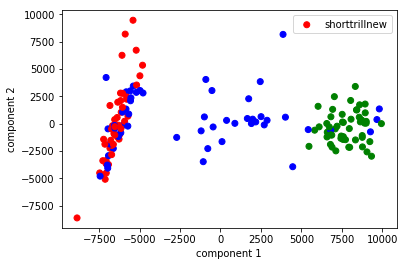

In [287]:
pca2 = PCA(n_components=100)

Xr2 = pca.fit_transform(X2)

color= ['red' if l == 'short' else 'green' if l == 'trill' else 'blue' for l in y]
plt.scatter(Xr2[:, 0], Xr2[:, 1],color=color)
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.legend(leg)


In [288]:
# Now let's run LDA with class discriminator.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2[0:152], y, test_size=0.1, random_state=0)  
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

lda = LDA(n_components=6)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test)  

In [258]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

In [259]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy' + str(accuracy_score(y_test, y_pred)))  

[[4 1 1]
 [0 4 0]
 [0 0 6]]
Accuracy0.875


## PCA/LDA with ONLY mps components added on (no spectral data included)

Text(0,0.5,'component 2')

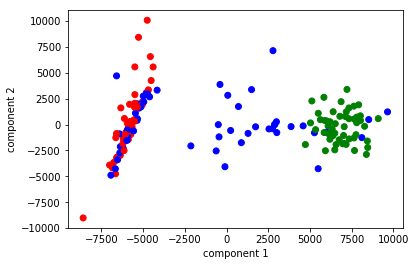

In [289]:
pca3 = PCA(n_components=140)
y_df = pd.DataFrame(y)
y_df.columns=['calltype']
plotting_df = pd.concat([nospec_df1,y_df],axis=1)
Xr3 = pca.fit_transform(X3)

color= ['red' if l == 'short' else 'green' if l == 'trill' else 'blue' for l in y]
plt.scatter(Xr3[:, 0], Xr3[:, 1],color=color)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [256]:
#### LDA for data without spectrogram information

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X3[0:152], y, test_size=0.1, random_state=0)  
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

lda = LDA(n_components=6)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test)  

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy' + str(accuracy_score(y_test, y_pred)))  

[[4 1 1]
 [2 2 0]
 [0 0 6]]
Accuracy0.75
